# COnsigna de inicio : 
Descripción
Comienza aquí si...
Tienes algo de experiencia con R o Python y conocimientos básicos de aprendizaje automático. Esta es una competencia perfecta para estudiantes de ciencia de datos que hayan completado un curso en línea de aprendizaje automático y estén buscando ampliar sus habilidades antes de probar una competencia destacada.

💡Cuaderno de Inicio
Para comenzar rápidamente, siéntete libre de aprovechar este cuaderno de inicio.

Descripción de la Competencia

Pide a un comprador de vivienda que describa su casa ideal, y probablemente no comenzará con la altura del techo del sótano o la proximidad a una vía de ferrocarril este-oeste. Pero el conjunto de datos de esta competencia demuestra que hay muchos más factores que influyen en las negociaciones de precio que el número de dormitorios o una cerca blanca.

Con 79 variables explicativas que describen (casi) todos los aspectos de las viviendas residenciales en Ames, Iowa, esta competencia te reta a predecir el precio final de cada casa.

Habilidades a Practicar
Ingeniería de características creativa
Técnicas avanzadas de regresión como bosques aleatorios y boosting de gradiente
Agradecimientos
El conjunto de datos de viviendas de Ames fue compilado por Dean De Cock para su uso en educación en ciencia de datos. Es una alternativa increíble para los científicos de datos que buscan una versión modernizada y ampliada del frecuentemente citado conjunto de datos de viviendas de Boston.

Foto por Tom Thain en Unsplash.

Evaluación
Objetivo
Tu tarea es predecir el precio de venta de cada casa. Para cada Id en el conjunto de prueba, debes predecir el valor de la variable SalePrice.

Métrica
Las presentaciones se evalúan en función del Error Cuadrático Medio (RMSE) entre el logaritmo del valor predicho y el logaritmo del precio de venta observado. (Tomar logaritmos significa que los errores en la predicción de casas caras y baratas afectarán el resultado por igual.)

Formato del Archivo de Envío
El archivo debe contener un encabezado y tener el siguiente formato:

Id,SalePrice
1461,169000.1
1462,187724.1233
1463,175221
etc.
Puedes descargar un archivo de ejemplo (sample_submission.csv) en la página de Datos.

# en este notebook aplicaremos feature enginering

In [2]:
def plot_error_distribution(y_true, y_pred):
    """
    Esta función toma los valores verdaderos y las predicciones, calcula el error,
    y muestra un gráfico con un histograma de errores y una curva KDE de la densidad.
    
    :param y_true: Array de valores verdaderos.
    :param y_pred: Array de valores predichos.
    """
    
    
    # Calcular errores
    errors = y_true - y_pred.flatten() # El método flatten() convierte un array multidimensional (por ejemplo, una matriz de 2D) en un array de una sola dimensión (un vector).

    #     # Crear la figura y el eje principal
    #     fig, ax1 = plt.subplots()
    
    # Crear la figura y el eje principal con un tamaño de figura mayor
    fig, ax1 = plt.subplots(figsize=(10, 6))  # Ajusta el tamaño aquí (ancho, alto)

    # Crear el histograma en el eje principal
    sns.histplot(errors, bins=20, edgecolor='k', alpha=0.7, ax=ax1)
    ax1.set_xlabel('Error = y_true - y_pred')
    ax1.set_ylabel('Frecuencia')
    ax1.set_title('Distribución de Errores de Predicción')
    
     # Ajustar el rango del eje x
    ax1.set_xlim([errors.min(), errors.max()])  # Ajusta según el rango de errores
    
    # Crear un segundo eje que comparte el mismo eje x
    ax2 = ax1.twinx()

    # Crear el KDE en el segundo eje
    sns.kdeplot(errors, ax=ax2, color='r')
    ax2.set_ylabel('Densidad')

    # Modificar la grilla del eje y de la derecha
    ax2.grid(True, which='both', axis='y', color='r', alpha=0.3)

    # Mostrar el gráfico
    plt.show()


# Submissions : 


In [3]:
# predictions = np.exp(my_model.predict(X_test))

# output = pd.DataFrame({'Id': X_test.index, 'SalePrice': predictions})
# output.to_csv('my_submission.csv', index=False)
# print("Your submission was successfully saved!")

# Import and configurations

In [4]:
import sys
import os

# Añadir la ruta al directorio del archivo .py
sys.path.append('/kaggle/input/libraries/utils_reg_eval')
import Utils # pronto cambiaremos el nombre a eval_reg_utils

In [5]:

import os
import warnings
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from pandas.api.types import CategoricalDtype

from category_encoders import MEstimateEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBRegressor


# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

# Mute warnings
warnings.filterwarnings('ignore')


/tmp/ipykernel_33/676408276.py:21: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


These are only a couple ways you could use the principal components. You could also try clustering using one or more components. One thing to note is that PCA doesn't change the distance between points -- it's just like a rotation. So clustering with the full set of components is the same as clustering with the original features. Instead, pick some subset of components, maybe those with the most variance or the highest MI scores.

For further analysis, you might want to look at a correlation matrix for the dataset:


---

Aquí tienes la traducción del texto:

---

Estas son solo algunas formas en las que podrías usar los componentes principales. También podrías intentar realizar clustering utilizando uno o más componentes. Una cosa a tener en cuenta es que PCA no cambia la distancia entre puntos: es como una rotación. Así que hacer clustering con el conjunto completo de componentes es lo mismo que hacer clustering con las características originales. En su lugar, elige un subconjunto de componentes, tal vez aquellos con la mayor varianza o los puntajes de MI más altos.

Para un análisis más profundo, podrías querer ver una matriz de correlación para el conjunto de datos:

---

In [6]:
import pandas as pd

house_price_train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv", index_col ='Id')
house_price_test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv", index_col = 'Id')

print(house_price_train.SalePrice.dtype) # variable objetivo # El objetivo es predecir el "valor de venta" de una casa en funcion de sus caracteristicas

X = house_price_train
y = house_price_train.pop("SalePrice")


int64


In [7]:
X.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal


# Analizamos nuestra variable objetivo - Feature enginering

Distribucion de precios de venta de las casas - Sesgo a la izquierda

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


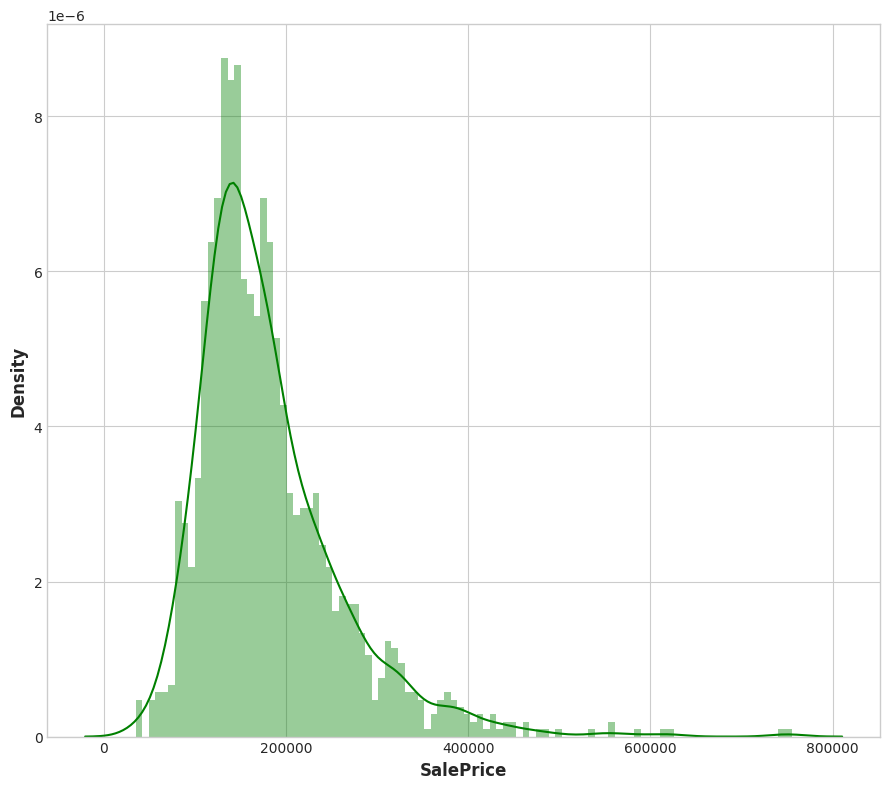

In [8]:
print(y.describe())
plt.figure(figsize=(9, 8))
sns.distplot(y, color='g', bins=100, hist_kws={'alpha': 0.4});

La transformación logarítmica es una técnica común para corregir sesgos a la izquierda. Al aplicar la función logarítmica, se reduce la diferencia entre los valores altos y bajos y acercar la distribución a una forma más normal

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64


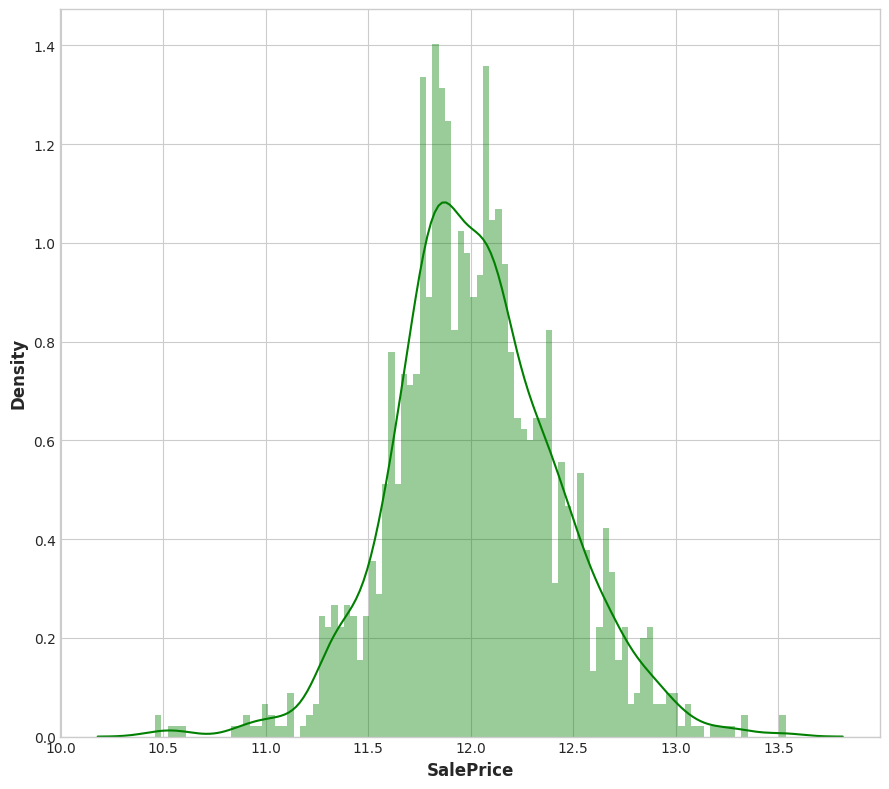

In [9]:
# Aplicar la transformación logarítmica
y_ = np.log(y)  # np.log1p maneja log(1 + x), útil si hay valores cero en los datos # lo usaremos para el entrenamiento

print(y_.describe())
plt.figure(figsize=(9, 8))
sns.distplot(y_, color='g', bins=100, hist_kws={'alpha': 0.4});
# Vamos a entrenar a los modelos con ello

# Dividimos los datos

In [10]:
from sklearn.model_selection import train_test_split

def obtener_datos_reg(X,y, train_size=0.8, random_state=1):

    # Primera división: conjunto de prueba
    X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, train_size=train_size, random_state=random_state)

    # Segunda división: conjunto de validación
    X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, train_size=train_size, random_state=random_state)

    total = X_train.shape[0] + X_valid.shape[0] + X_test.shape[0]

    def porcent(num):
        result = num/total * 100 
        return f"{int(result)}%"

    print("el total de filas es : ", total)
    print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]}  -> {porcent(X_train.shape[0])}")
    print(f"Tamaño del conjunto de validación: {X_valid.shape[0]} -> {porcent(X_valid.shape[0])}")
    print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} -> {porcent(X_test.shape[0])}")

    return X_train, X_valid, y_train, y_valid, X_test, y_test

# prueba de uso
X_train, X_valid, y_train, y_valid, X_test, y_test = obtener_datos_reg(X,y)

y_train.head()

el total de filas es :  1460
Tamaño del conjunto de entrenamiento: 934  -> 63%
Tamaño del conjunto de validación: 234 -> 16%
Tamaño del conjunto de prueba: 292 -> 20%


Id
616     137500
1008     88000
507     215000
1355    235000
918     135000
Name: SalePrice, dtype: int64

In [11]:
y_test.head()

Id
259     231500
268     179500
289     122000
650      84500
1234    142000
Name: SalePrice, dtype: int64

# Preprocesamos - scikit learn utils: 



#### podemos ir alternando entre usar el de pandas para poder manipular internamente con funciones de scikit learn y dejarlo con pandas, o en default para la pipeline de scikit : 

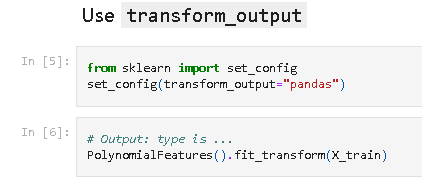

In [12]:
from sklearn import set_config
set_config(transform_output="default")

In [13]:
# Seleccionar las columnas numéricas
numerical_cols = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64']]

high_cardinality_cols = [cname for cname in X_train.columns if X_train[cname].nunique() >= 10 and X_train[cname].dtype == "object"]

low_cardinality_cols = [cname for cname in X_train.columns if X_train[cname].nunique() < 10 and X_train[cname].dtype == "object"]
X_train[low_cardinality_cols].nunique() # las que usaremos como one hot

MSZoning         5
Street           2
Alley            2
LotShape         4
LandContour      4
Utilities        2
LotConfig        5
LandSlope        3
Condition1       9
Condition2       8
BldgType         5
HouseStyle       8
RoofStyle        6
RoofMatl         7
MasVnrType       3
ExterQual        4
ExterCond        5
Foundation       6
BsmtQual         4
BsmtCond         4
BsmtExposure     4
BsmtFinType1     6
BsmtFinType2     6
Heating          6
HeatingQC        4
CentralAir       2
Electrical       5
KitchenQual      4
Functional       7
FireplaceQu      5
GarageType       6
GarageFinish     3
GarageQual       5
GarageCond       5
PavedDrive       3
PoolQC           3
Fence            4
MiscFeature      4
SaleType         9
SaleCondition    6
dtype: int64

# Definicion de Pipeline / Modelo : XGboost / Configurar la búsqueda de hiperparámetros con Optuna:

In [14]:
def eval_reg(model):
    final_pipeline = model
#     final_pipeline.fit(X_train, y_train)

    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

    # Evaluate on the validation set
    valid_preds = final_pipeline.predict(X_valid)
    valid_r2 = r2_score(y_valid, valid_preds)
    valid_mae = mean_absolute_error(y_valid, valid_preds)
    valid_rmse = np.sqrt(mean_squared_error(y_valid, valid_preds))

    print("Validation R^2: ", valid_r2)
    print("Validation MAE: ", valid_mae)
    print("Validation RMSE: ", valid_rmse)

    # Evaluate on the test set
    test_preds = final_pipeline.predict(X_test)
    test_r2 = r2_score(y_test, test_preds)
    test_mae = mean_absolute_error(y_test, test_preds)
    test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))

    print("Test R^2 : ", test_r2)
    print("Test MAE : ", test_mae)
    print("Test RMSE : ", test_rmse)


In [15]:
import optuna
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_absolute_error, make_scorer

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())  # Agrega StandardScaler aquí
]) # agregando el standard scaler el modelo bajo ligeramente su MAE del cv

# Preprocesamiento para datos categóricos de baja cardinalidad
low_cardinality_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocesamiento para datos categóricos de alta cardinalidad
high_cardinality_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('high_card', high_cardinality_transformer, high_cardinality_cols),
        ('low_card', low_cardinality_transformer, low_cardinality_cols)
    ])

model = XGBRegressor()

# Create the pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

log_y = np.log(y)
score = cross_val_score(
    model, X, log_y, cv=5, scoring="neg_mean_squared_error",
)
score = -1 * score.mean()
score = np.sqrt(score)

print("rmse: ", score)




ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
  File "/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py", line 1055, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
  File "/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py", line 521, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
  File "/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py", line 958, in _create_dmatrix
    return QuantileDMatrix(
  File "/opt/conda/lib/python3.10/site-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
  File "/opt/conda/lib/python3.10/site-packages/xgboost/core.py", line 1529, in __init__
    self._init(
  File "/opt/conda/lib/python3.10/site-packages/xgboost/core.py", line 1588, in _init
    it.reraise()
  File "/opt/conda/lib/python3.10/site-packages/xgboost/core.py", line 576, in reraise
    raise exc  # pylint: disable=raising-bad-type
  File "/opt/conda/lib/python3.10/site-packages/xgboost/core.py", line 557, in _handle_exception
    return fn()
  File "/opt/conda/lib/python3.10/site-packages/xgboost/core.py", line 641, in <lambda>
    return self._handle_exception(lambda: self.next(input_data), 0)
  File "/opt/conda/lib/python3.10/site-packages/xgboost/data.py", line 1280, in next
    input_data(**self.kwargs)
  File "/opt/conda/lib/python3.10/site-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
  File "/opt/conda/lib/python3.10/site-packages/xgboost/core.py", line 624, in input_data
    new, cat_codes, feature_names, feature_types = _proxy_transform(
  File "/opt/conda/lib/python3.10/site-packages/xgboost/data.py", line 1315, in _proxy_transform
    arr, feature_names, feature_types = _transform_pandas_df(
  File "/opt/conda/lib/python3.10/site-packages/xgboost/data.py", line 490, in _transform_pandas_df
    _invalid_dataframe_dtype(data)
  File "/opt/conda/lib/python3.10/site-packages/xgboost/data.py", line 308, in _invalid_dataframe_dtype
    raise ValueError(msg)
ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:MSZoning: object, Street: object, Alley: object, LotShape: object, LandContour: object, Utilities: object, LotConfig: object, LandSlope: object, Neighborhood: object, Condition1: object, Condition2: object, BldgType: object, HouseStyle: object, RoofStyle: object, RoofMatl: object, Exterior1st: object, Exterior2nd: object, MasVnrType: object, ExterQual: object, ExterCond: object, Foundation: object, BsmtQual: object, BsmtCond: object, BsmtExposure: object, BsmtFinType1: object, BsmtFinType2: object, Heating: object, HeatingQC: object, CentralAir: object, Electrical: object, KitchenQual: object, Functional: object, FireplaceQu: object, GarageType: object, GarageFinish: object, GarageQual: object, GarageCond: object, PavedDrive: object, PoolQC: object, Fence: object, MiscFeature: object, SaleType: object, SaleCondition: object


In [ ]:
y_train

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


def log_val_reg(my_pipeline): # siendo my_pipeline = model de la pipeline 
    # Entrena el modelo con la transformación logarítmica
    final_pipeline = my_pipeline
    final_pipeline.fit(X_train, np.log(y_train))

    # Realizar predicciones en el conjunto de validación
    valid_preds_log = final_pipeline.predict(X_valid)

    # Revertir la transformación logarítmica
    valid_preds = np.exp(valid_preds_log)

    # Calcular métricas en la escala original
    valid_r2 = r2_score(y_valid, valid_preds)
    valid_mae = mean_absolute_error(y_valid, valid_preds)
    valid_rmse = np.sqrt(mean_squared_error(y_valid, valid_preds))

    print("Validation R^2: ", valid_r2)
    print("Validation MAE: ", valid_mae)
    print("Validation RMSE: ", valid_rmse)

    # Realizar predicciones en el conjunto de prueba
    test_preds_log = final_pipeline.predict(X_test)

    # Revertir la transformación logarítmica
    test_preds = np.exp(test_preds_log)

    # Calcular métricas en la escala original
    test_r2 = r2_score(y_test, test_preds)
    test_mae = mean_absolute_error(y_test, test_preds)
    test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))

    print("Test R^2 : ", test_r2)
    print("Test MAE : ", test_mae)
    print("Test RMSE : ", test_rmse)
    
log_val_reg(my_pipeline)


In [ ]:
# eval_reg(my_pipeline)

# plot error distribution # Test
final_pipeline = my_pipeline
final_pipeline.fit(X_train, np.log(y_train))

# Realizar predicciones en el conjunto de prueba
test_preds_log = final_pipeline.predict(X_test)

# Revertir la transformación logarítmica
test_preds = np.exp(test_preds_log)

plot_error_distribution(y_test, test_preds) 

# aun predice valore extremos

# Entrenar el modelo con los mejores hiperparámetros y evaluar

# Vemos el dataframe preprocesado


# Filtramos Caracteristicas, aplicamos MI o mutual information

Métrica de utilidad de características, una función que mide las asociaciones entre una característica y el objetivo.

La información mutua es una medida de la dependencia entre dos variables. En términos más técnicos, mide cuánto conocimiento se obtiene sobre una variable al conocer el valor de la otra. La información mutua se basa en la teoría de la información y se utiliza para evaluar la relación entre dos variables aleatorias.



La información mutua describe relaciones en términos de incertidumbre. La información mutua (MI) entre dos cantidades es una medida de hasta qué punto el conocimiento de una cantidad reduce la incertidumbre sobre la otra.

In [ ]:
# # Hyper parameter tunning

# import optuna
# from xgboost import XGBRegressor
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import mean_absolute_error

# # Preprocessing for numerical data
# numerical_transformer = SimpleImputer(strategy='constant', fill_value=0)

# # Preprocessing for categorical data
# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# # Bundle preprocessing for numerical and categorical data
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_transformer, numerical_cols),
#         ('cat', categorical_transformer, categorical_cols)
#     ])

# # Objective function for Optuna
# def objective(trial):
#     param = {
#         'n_estimators': trial.suggest_int('n_estimators', 30, 400),
#         'max_depth': trial.suggest_int('max_depth', 1, 11),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
#         'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 1.0),
#         'gamma': trial.suggest_float('gamma', 0, 7),
#         'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1e-2),
#         'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1e-2),
#     }

#     model = XGBRegressor(**param)

#     # Create the pipeline
#     my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                                   ('model', model)
#                                  ])
    
#     # Perform cross-validation
#     scores = -1 * cross_val_score(my_pipeline, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
# #     scores = cross_val_score(my_pipeline, X_train, y_train, cv=5, scoring='r2')
    
#     return scores.mean()

# # Create a study object and specify the direction as 'minimize'
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=140)

# # Get the best hyperparameters
# best_params = study.best_params
# print("Best hyperparameters: ", best_params)
